<img src="../assets/images/Cover.png" alt="Cover" title="AI2E Cover" />

## AI2E - 4 -  Supervised Learning Algorithms 
In this workshop, you will learn more about some powerful supervised learning algorithms such as : Support vector machines, k-nearest neighbours, Tree Based models and Naive Bayes. We hope you will find it useful. Feel free to ask any questions! 


### Content 

1. Support vector machines
2. Tree-based models

    2.1 Random Forests
    
    2.2. Boosting trees
    - Gradient Boosted trees





In [1]:
import numpy as np
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import neighbors, svm, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

#### Dataset Description :
The iris dataset consists of 3 different types of irises’(flowers) (Setosa, Versicolour, and Virginica).
It contains 150 samples with 4 features for each : Sepal Length, Sepal Width, Petal Length and Petal Width.

<img src="./images/irisFlowers.jpg" />

In [2]:
iris = datasets.load_iris()   
X = iris.data[:, :2]    #extract the first two features
y = iris.target

h = .02  # step size in the mesh(used for plotting decision regions)
cmap = cm.get_cmap('Pastel2',3)       #setting colors 
cmap2 = cm.get_cmap('Set1')


## 1. Support Vector Machines (SVM) : 

In [3]:
# we generate two matrices containing all combinations of the first and second feature from X1.min to X1.max 
# and from X2.min to X2.max.
# we need those points to draw decision regions with the decision boundaries.

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

#### Different kernels :
let's see the impact of changing the kernel on our predictions !

In [4]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),                 #we instanciate models with different kernels
          svm.SVC(kernel='poly', degree=2, C=C),
         svm.SVC(kernel='poly', degree=5, C=C),)

models = tuple((clf.fit(X, y) for clf in models))

titles = ('SVC with linear kernel',
          'SVC with (Gaussian) RBF kernel',
          'SVC with polynomial (degree 2) kernel',
          'SVC with polynomial (degree 5) kernel',
          )

In [5]:
def plottingFunction(fittedModelsList, titlesList, figsize):
        
    nbrRows = ceil(len(fittedModelsList) / 2)
    fig, sub = plt.subplots(nbrRows, 2, figsize = (figsize,figsize))     #setting number of our subplots
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    for clf, title, ax in zip(fittedModelsList, titlesList, sub.flatten()):       #for every model
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])                          #we make predictions
        Z = Z.reshape(xx.shape)                                                  
        out = ax.contourf(xx, yy, Z, cmap=cmap)          #plot the decision regions (each region represents a class)
        ax.scatter(X[:, 0], X[:, 1], c=y, s=22, cmap=cmap2, edgecolors='k')     #plot our training set datapoints 
        ax.set_xlim(xx.min(), xx.max())                                         #(different colors for different classes)
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_title(title)

    plt.show()

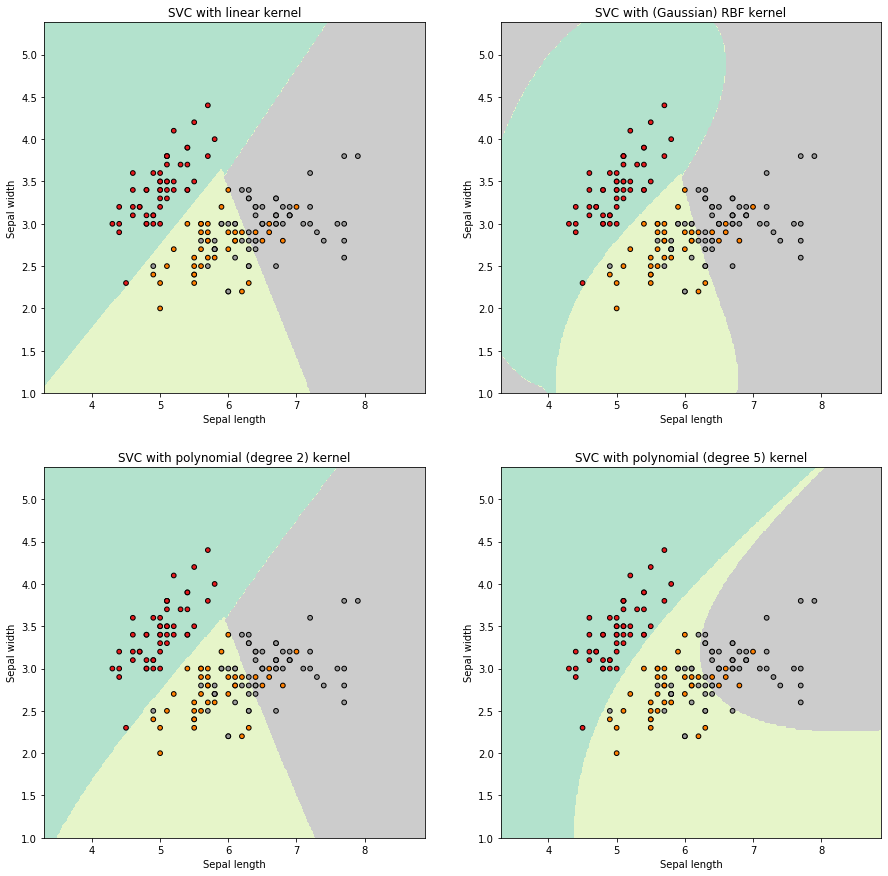

In [6]:
plottingFunction(models, titles,15)

#### Regularization parameter :
let's see the impact of changing the Regularization parameter on our predictions :

In [7]:
models = (svm.SVC(kernel='rbf', C=0.1),
          svm.SVC(kernel='rbf',  C=1),
          svm.SVC(kernel='rbf', C=10),
         svm.SVC(kernel='rbf',   C=100))
models = tuple((clf.fit(X, y) for clf in models))

titles = ('SVC with C = 0.1',
          'SVC with C = 1',
          'SVC with C = 10',
          'SVC with C = 100')

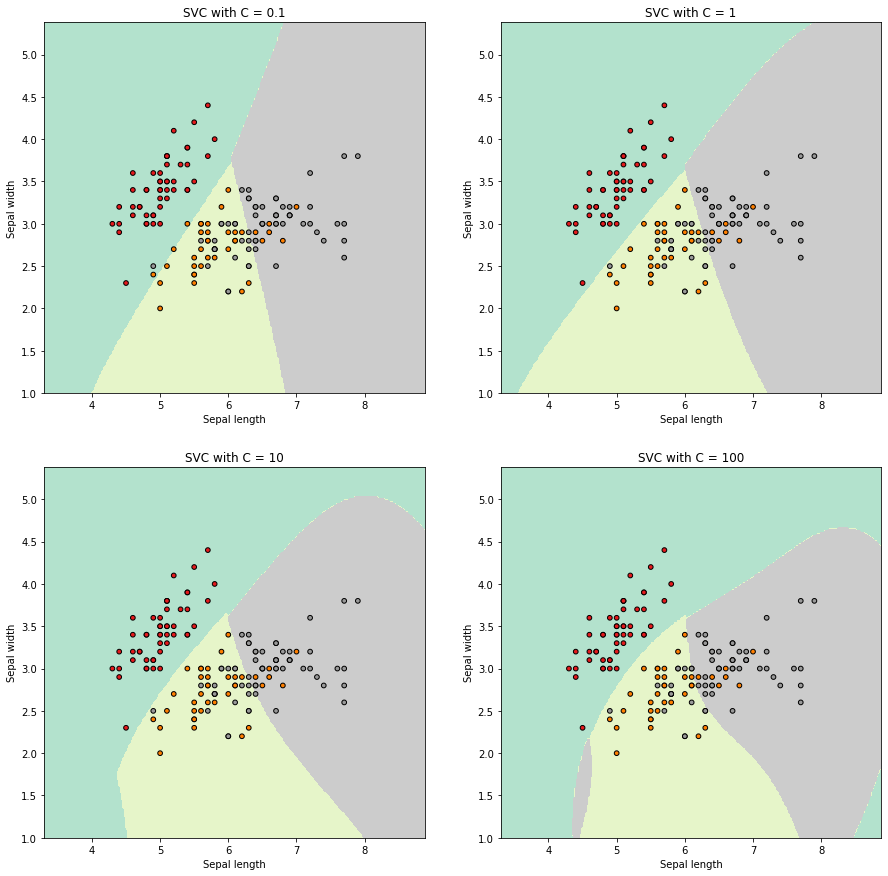

In [8]:
plottingFunction(models, titles,15)

## 2. Tree based models : 
### 2.1 Decision Trees :


In [9]:
#We instanciate our model
clf = DecisionTreeClassifier(random_state=1, max_depth=4) #max depth of a decision tree 
clf.fit(X, y)     #fitting the model to training set

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

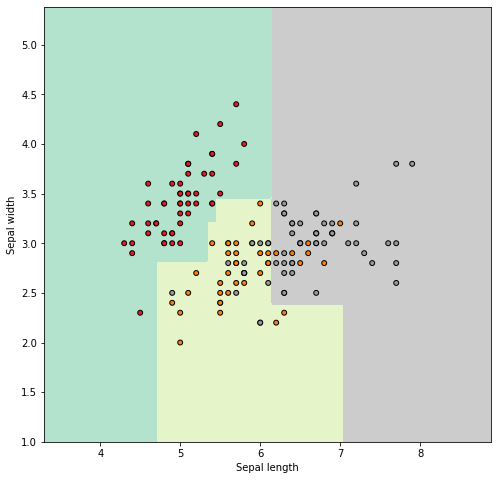

In [10]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   #making predictions
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8))
out = plt.contourf(xx, yy, Z, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, s=24, cmap=cmap2, edgecolors='k', marker="o")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### 2.1 Random forests :


In [14]:
clf = RandomForestClassifier(random_state=1, n_estimators = 10, max_depth=2)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

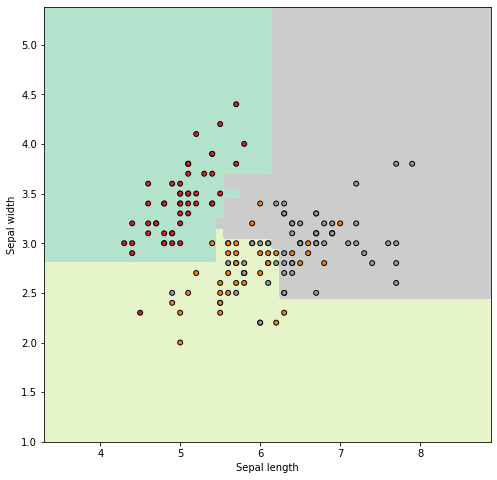

In [15]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8))
out = plt.contourf(xx, yy, Z, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, s=24, cmap=cmap2, edgecolors='k', marker="o")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### 2.1 Boosting Trees :
#### Gradient Boosted trees : 

In [16]:
clf = GradientBoostingClassifier(random_state=1,) # we initialise a gradient boosting classifier

In [17]:
paramsGB = {'n_estimators' : [10, 100, 500],         # we define a grid of the most important parameters 
    'learning_rate': [0.1, 0.4, 0.8],               
    'max_depth' : [2, 4, 10]
}

In [18]:
gridGB = GridSearchCV(estimator=clf,               # we do a grid search which means a search over all parameters combinations
                       param_grid=paramsGB,         # cv = 3 for cross validation splitting strategy
                       scoring='accuracy',           # here it means: we split our dataset set to 3 subsets and each time 
                       cv=3,                         # we train our models on 2 subset and evaluate it on the third one
                       verbose=1,
                       n_jobs=-1,
                        return_train_score = True)
gridGB.fit(X, y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   16.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [19]:
df = pd.DataFrame(gridGB.cv_results_)

In [20]:
df[['param_learning_rate', 'param_max_depth','param_n_estimators','mean_train_score','mean_test_score', 'rank_test_score']]

,param_learning_rate,param_max_depth,param_n_estimators,mean_train_score,mean_test_score,rank_test_score
0,0.1,2,10,0.820000,0.800000,1
1,0.1,2,100,0.916667,0.720000,14
2,0.1,2,500,0.953333,0.720000,14
3,0.1,4,10,0.900000,0.733333,7
4,0.1,4,100,0.953333,0.720000,14
5,0.1,4,500,0.953333,0.733333,7
6,0.1,10,10,0.953333,0.686667,27
7,0.1,10,100,0.953333,0.706667,24
8,0.1,10,500,0.953333,0.733333,7
9,0.4,2,10,0.880000,0.760000,2


In [21]:
best_model = gridGB.best_estimator_ #we select the best model after parameter tuning
best_model.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

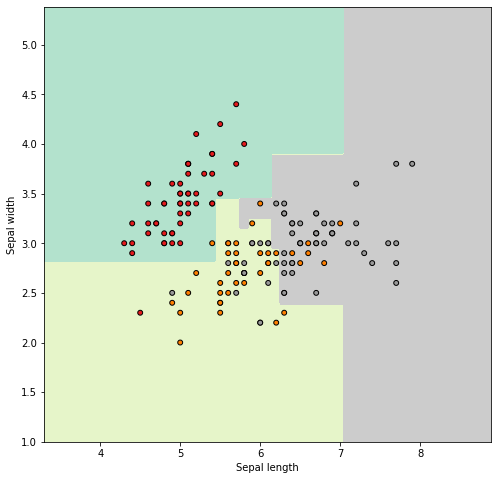

In [22]:
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])   #making predictions using the best model
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8))
out = plt.contourf(xx, yy, Z, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, s=24, cmap=cmap2, edgecolors='k', marker="o")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()